In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (8,4)

CB_color_cycle = ['#8ecae6', '#1D5D9B', '#023047',
                  '#ffb703', '#fb8500']
sns.set_palette(sns.color_palette(CB_color_cycle, 5))

In [37]:
primary = pd.read_excel("primary_results/primary_notExtend.xlsx" , sheet_name=None)
sheets = list(primary.keys())
primary_summay = pd.DataFrame()
for name in sheets:
    df2 = pd.DataFrame([[primary[name]['mismatch'].sum()/(primary[name].shape[0])*100, 
                         primary[name]['indel'].sum()/(primary[name].shape[0])*100, 
                         primary[name]['low_quality'].sum()/(primary[name].shape[0])*100, 
                         primary[name]['normal'].sum()/(primary[name].shape[0])*100]], index=[name])
    primary_summay = pd.concat([primary_summay ,df2])
primary_summay.columns = ['Mismatch', 'Indel', 'Low_quality', 'Normal']
primary_summay = primary_summay.reset_index()
primary_summay

,index,Mismatch,Indel,Low_quality,Normal
0,mCanLor1,45.512821,36.538462,36.538462,14.743590
1,mCerEla1,4.838710,12.903226,56.451613,35.483871
2,mCynVol1,23.931624,26.495726,68.376068,6.837607
3,mEleMax1,56.756757,11.711712,4.504505,36.936937
4,mMacEug1,0.000000,0.000000,3.703704,96.296296
5,mMonDom1,88.888889,22.222222,0.000000,5.555556
6,mNeoNeb1,0.000000,18.390805,42.528736,54.022989


/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: xlabel='index', ylabel='percent'>

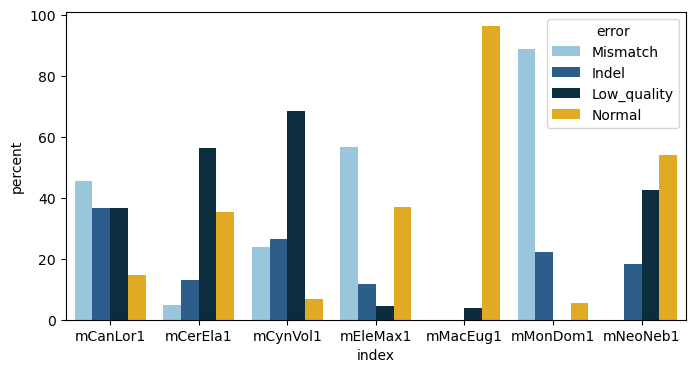

In [38]:
sns.barplot(data=primary_summay.melt(id_vars='index',
                                  value_name='percent', var_name='error'),
            x='index', y='percent', hue='error')

In [58]:
combined = pd.read_excel("combined_results/combined_notExtend.xlsx" , sheet_name=None)
sheets = list(combined.keys())
combined_summay = pd.DataFrame()
for name in sheets:
    df2 = pd.DataFrame([[combined[name]['mismatch'].sum()/combined[name].shape[0]*100, 
                         combined[name]['indel'].sum()/combined[name].shape[0]*100, 
                         combined[name]['low_quality'].sum()/combined[name].shape[0]*100, 
                         combined[name]['normal'].sum()/combined[name].shape[0]*100]], index=[name])
    combined_summay = pd.concat([combined_summay ,df2])
combined_summay.columns = ['Mismatch', 'Indel', 'Low_quality', 'Normal']
combined_summay = combined_summay.reset_index()
combined_summay

,index,Mismatch,Indel,Low_quality,Normal
0,mCanLor1,14.859438,17.269076,42.971888,38.955823
1,mCerEla1,0.000000,15.789474,77.192982,21.929825
2,mCynVol1,14.285714,23.129252,65.986395,19.727891
3,mEleMax1,0.000000,1.250000,44.583333,54.583333
4,mMacEug1,0.000000,0.000000,47.916667,52.083333
5,mMonDom1,0.000000,15.555556,37.777778,51.111111
6,mNeoNeb1,0.000000,13.125000,74.375000,23.125000


/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: xlabel='index', ylabel='percent'>

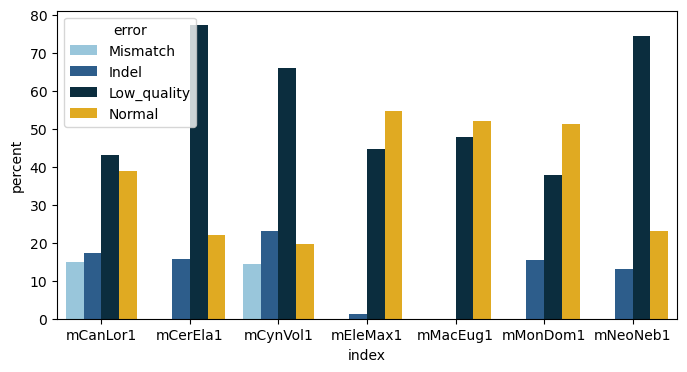

In [59]:
sns.barplot(data=combined_summay.melt(id_vars='index',
                                  value_name='percent', var_name='error'),
            x='index', y='percent', hue='error')

In [60]:
delta = pd.concat([primary_summay.melt(id_vars='index', value_name='percent', var_name='error'),
           combined_summay.melt(id_vars='index', value_name='percent', var_name='error')], axis=1)
delta['delta'] = delta.iloc[:, 5] - delta.iloc[:, 2]
delta.columns = ["name", "error", "pri_percent", "index",  "error1", "comb_precent", "delta"]


/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yixinzhu/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: xlabel='name', ylabel='delta'>

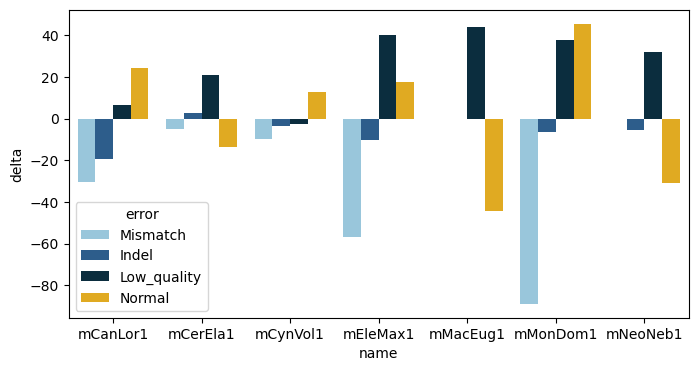

In [61]:
sns.barplot(delta, x='name', y='delta', hue='error')